In [220]:
%reload_ext autoreload
%autoreload 2

In [221]:
import sys
sys.path.insert(1,'./../../src/') 

import unittest
import numpy as np
import methods
import glob
import matplotlib.pyplot as plt
import scipy
import os

In [222]:
# Build "Trajectory" object
lx, ly, lz = (2, 1, 0.5)
delta = 0.05
x = np.arange(0,lx,delta)
y = np.arange(0,ly,delta)
z = np.arange(0,lz,delta)
xv, yv, zv = np.meshgrid(x,y,z)
X = np.stack([xv.flatten(), yv.flatten(), zv.flatten()], axis=1)[:,:,None]

traj = methods.Trajectory(
    X = X,
    t = [0]
)

# test
traj.Xat(0)


array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.05],
       [0.  , 0.  , 0.1 ],
       ...,
       [1.95, 0.95, 0.35],
       [1.95, 0.95, 0.4 ],
       [1.95, 0.95, 0.45]])

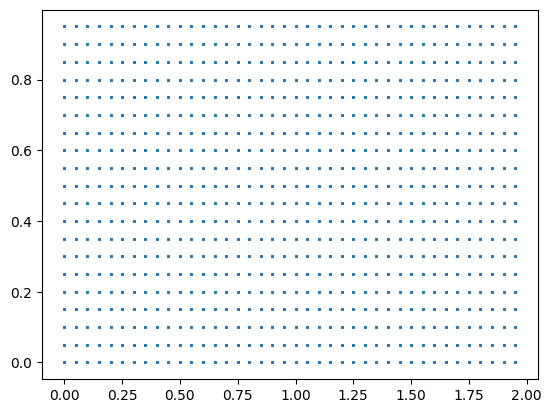

In [223]:
plt.scatter(X[:,0],X[:,1],s=0.5)

In [224]:
X0 = traj.Xat(0)
eps = methods.nndist(X0,k=7)
eps
print(traj.n_s)

8000


In [225]:
P = methods.dynamic_laplacian(
    traj,
    eps=eps,
    alpha=1,
    include_mult=3
    )

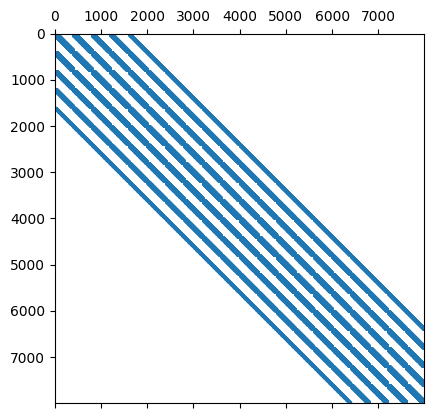

In [226]:
plt.spy(P,markersize=0.5)

In [227]:
vals, vecs= scipy.sparse.linalg.eigs(P,which='LM')

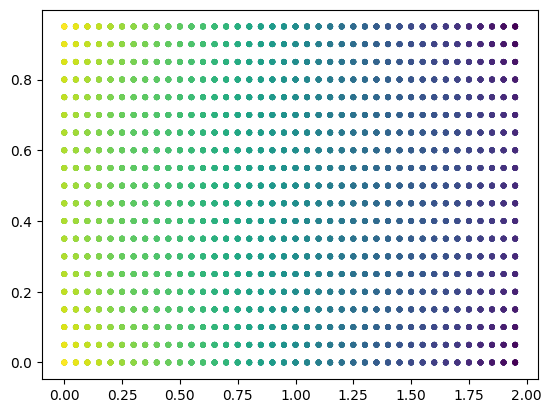

In [228]:
Xn = traj.Xat(0)
plt.scatter(Xn[:,0],Xn[:,1],c=vecs[:,1],s=10)

In [235]:
S, R = methods.SEBA(vecs[:,:2])

/Users/jackh/Documents/2023/Turbulence Research/Code/examples/static_rectangle/./../../src/methods.py:369: ComplexWarning: Casting complex values to real discards the imaginary part


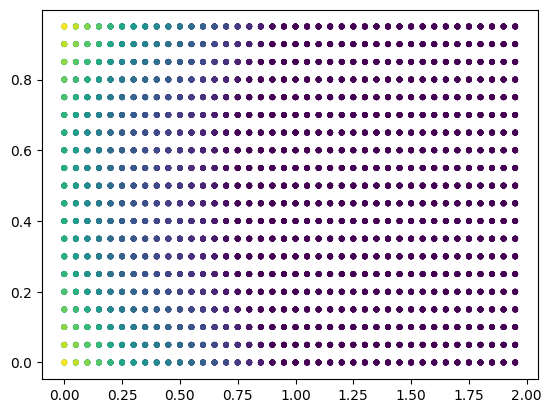

In [237]:
plt.scatter(Xn[:,0],Xn[:,1],c=S[:,1],s=10)